Team ID:PNT2022TMID46260

**Importing The ImageDataGenerator Library**

In [12]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Define the parameters/arguments for ImageDataGenerator class**

In [13]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

**Applying ImageDataGenerator functionality to trainset**

In [15]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


**Applying ImageDataGenerator functionality to testset**

In [16]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [17]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

**Import model building libraries**

In [18]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')


**Initializing the model**

In [57]:
model =Sequential()

**Add CNN Layer**

In [58]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

**Add Hidden Layer**

In [59]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

**Configure the learning process**

In [60]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

**Train the model**

In [62]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=5,validation_data=x_test,validation_steps=4)

Epoch 1/5
14/14 [==============================] - 33s 2s/step - loss: 0.5697 - accuracy: 0.7018 - val_loss: 0.2470 - val_accuracy: 0.9421
Epoch 2/5
14/14 [==============================] - 36s 3s/step - loss: 0.3486 - accuracy: 0.8280 - val_loss: 0.1461 - val_accuracy: 0.9752
Epoch 3/5
14/14 [==============================] - 30s 2s/step - loss: 0.2088 - accuracy: 0.9060 - val_loss: 0.0464 - val_accuracy: 0.9917
Epoch 4/5
14/14 [==============================] - 34s 2s/step - loss: 0.1883 - accuracy: 0.9128 - val_loss: 0.0730 - val_accuracy: 0.9669
Epoch 5/5
14/14 [==============================] - 30s 2s/step - loss: 0.1682 - accuracy: 0.9220 - val_loss: 0.0353 - val_accuracy: 1.0000


**Save The Model**

In [31]:
model.save("/content/drive/MyDrive/archive(1)/forest1.h5")

**Predictions**

In [32]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [33]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [34]:
print(len(predictions))

121


In [36]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [37]:
#load the saved model
model = load_model("/content/drive/MyDrive/archive(1)/forest1.h5")

In [38]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [39]:
predictImage("/content/drive/MyDrive/Dataset/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 109ms/step
[[1.]]
 fire


**OpenCV For Video Processing**

In [40]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.6 MB/s 


In [41]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=81d5eaff42a76c8c818cc053e8955fc8ef345b03824112ae2c4da8cb45109e4d
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [42]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [44]:
#load the saved model
model = load_model(r'/content/drive/MyDrive/archive(1)/forest1.h5')
#define video
video = cv2.VideoCapture('/content/Fighting Fire with Fire _ Explained in 30 Seconds.mp4')
#define the features
name = ['forest','with forest']

**Creating An Account In Twilio Service**

In [45]:
account_sid='ACfb4e6d0e7b0d25def63044919f1b96e3'
auth_token='f9ae4fc4a617a527da8672e97eefb2d8'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
      body='Forest Fire is detected, stay alert',
      from_='+1 302 248 4366',
      to='+91 99400 12164'
)
print(message.sid)

SMaf67c32f7d9ec38f512cb2c156f53076


**Sending Alert Message**

In [47]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1/1 [==============================] - 0s 32ms/step


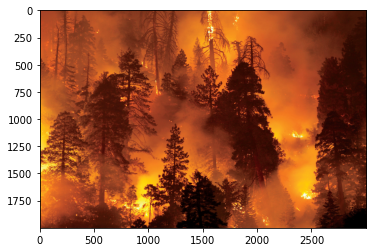

Forest fire


In [79]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/Dataset/test_set/with fire/Wild_fires.jpg',target_size=(128,128))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img)
plt.show()
if val==1:
  print('Forest fire')

In [81]:
if val==1:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='ACfb4e6d0e7b0d25def63044919f1b96e3'
  auth_token='f9ae4fc4a617a527da8672e97eefb2d8'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+1 302 248 4366',
      #to number
      to='+91 99400 12164')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif val==0:
  print('No Fire')

Forest fire
Forest fire
SMecc097520dc517b33e614c710d406781
Fire detected
SMS Sent!
